In [ ]:
# Permutation t-testing

Observed difference in means: 8.200000000000003
P-value: 0.006


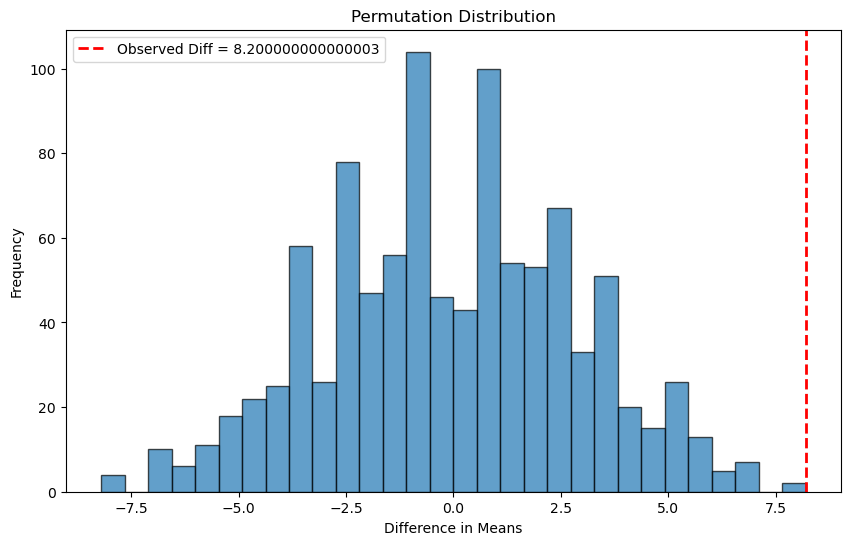

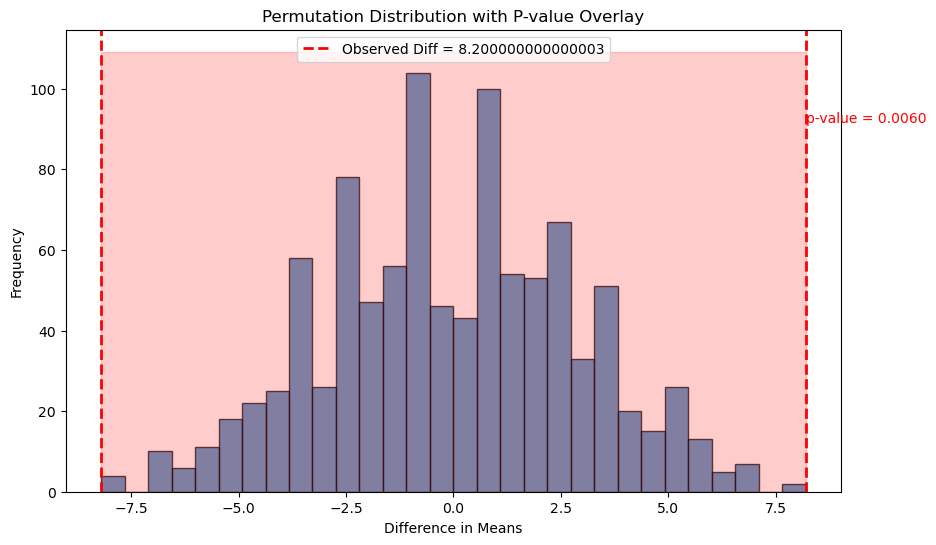

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
group_A = np.array([85, 88, 90, 91, 87])
group_B = np.array([78, 82, 80, 81, 79])

# Observed difference in means
observed_diff = np.mean(group_A) - np.mean(group_B)
print(f"Observed difference in means: {observed_diff}")

# Combine the data
combined_data = np.concatenate([group_A, group_B])

# Number of permutations
num_permutations = 1000
permutation_diffs = []

# Perform permutations
np.random.seed(0)  # For reproducibility
for _ in range(num_permutations):
    np.random.shuffle(combined_data)
    new_group_A = combined_data[:len(group_A)]
    new_group_B = combined_data[len(group_A):]
    new_diff = np.mean(new_group_A) - np.mean(new_group_B)
    permutation_diffs.append(new_diff)

# Convert to numpy array for easier handling
permutation_diffs = np.array(permutation_diffs)

# Calculate p-value
count_extreme = np.sum(np.abs(permutation_diffs) >= np.abs(observed_diff))
p_value = count_extreme / num_permutations
print(f"P-value: {p_value}")

# Plot the distribution of permutation differences
plt.figure(figsize=(10, 6))
plt.hist(permutation_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Diff = {observed_diff}')
plt.title('Permutation Distribution')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot permutation distribution with p-value overlay
plt.figure(figsize=(10, 6))
plt.hist(permutation_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Diff = {observed_diff}')
plt.axvline(-observed_diff, color='red', linestyle='dashed', linewidth=2)
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=-observed_diff, x2=observed_diff, color='red', alpha=0.2)
plt.title('Permutation Distribution with P-value Overlay')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.text(observed_diff, plt.ylim()[1]*0.8, f'p-value = {p_value:.4f}', color='red')
plt.show()
